In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
qtl_res = pd.read_csv('../outs/final_qtl_res.csv', index_col=0)
qtl_res_tetra = pd.read_csv('../outs/final_qtl_res_tetra.csv', index_col=0)

In [14]:
qtl_res_tetra

,metric,chr,pos,end,LOD,lod_thresh
1,% denovo,chr1,3010274,3010274,0.165389,3.600196
2,% denovo,chr1,3492195,3492195,0.165389,3.600196
3,% denovo,chr1,3511204,3511204,0.165424,3.600196
4,% denovo,chr1,3659804,3659804,0.165424,3.600196
5,% denovo,chr1,3777023,3777023,0.165459,3.600196
...,...,...,...,...,...,...
28400,% expanded,chr19,61132595,61132595,0.064770,3.628670
28401,% expanded,chr19,61166830,61166830,0.111689,3.628670
28402,% expanded,chr19,61167435,61167435,0.111689,3.628670
28403,% expanded,chr19,61221468,61221468,0.111702,3.628670


In [15]:
denovo_data = qtl_res[qtl_res['metric']=='% denovo']
expanded_data = qtl_res[qtl_res['metric']=='% expanded']
deltacontr_data = qtl_res[qtl_res['metric']=='delta (RU) contr']
deltaexpan_data = qtl_res[qtl_res['metric']=='delta (RU) expan']

In [16]:
denovo_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='% denovo']
expanded_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='% expanded']
deltacontr_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='delta (RU) contr']
deltaexpan_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='delta (RU) expan']

In [17]:
# find max length of chr based on furthest snp (approx)
chr_len = {}
for index, row in denovo_data.iterrows():
    chrom = row['chr']
    cur_len = row['end']
    if chrom in chr_len:
        chr_len[chrom] = max(chr_len[chrom], cur_len)
    else:
        chr_len[chrom] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]

In [18]:
labels_pos = []
labels_chr = []   
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels_chr.append(key.split('chr')[1])

In [19]:
flattened_pos = []
for index, row in denovo_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
denovo_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in expanded_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
expanded_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltacontr_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltacontr_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltaexpan_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltaexpan_data.insert(6, 'flattened_pos', flattened_pos)


In [20]:
flattened_pos = []
for index, row in denovo_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
denovo_data_tetra.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in expanded_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
expanded_data_tetra.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltacontr_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltacontr_data_tetra.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltaexpan_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltaexpan_data_tetra.insert(6, 'flattened_pos', flattened_pos)


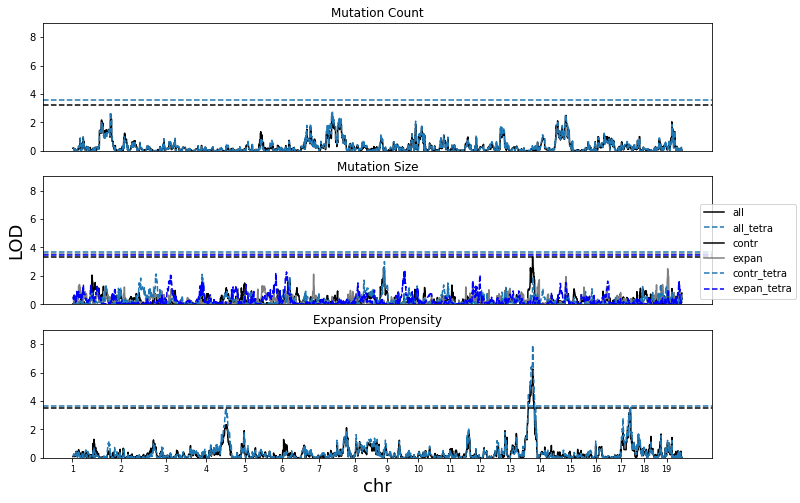

In [21]:
fig, ax = plt.subplots(3, figsize=(12, 8))
ax[0].set_ylim([0, 9])
ax[0].plot(denovo_data['flattened_pos'], denovo_data['LOD'], color = 'black', label='all')
ax[0].plot(denovo_data_tetra['flattened_pos'], denovo_data_tetra['LOD'], color = 'tab:blue', label='all_tetra', linestyle='--')
ax[0].axhline(y = list(denovo_data['lod_thresh'])[0], color = 'black', linestyle='--')
ax[0].axhline(y = list(denovo_data_tetra['lod_thresh'])[0], color = 'tab:blue', linestyle='--')

ax[0].tick_params(axis='both', bottom=False, labelbottom=False)
ax[0].axes.xaxis.set_ticklabels([])
ax[0].title.set_text('Mutation Count')

ax[1].set_ylim([0, 9])
ax[1].plot(deltacontr_data['flattened_pos'], deltacontr_data['LOD'], color='black', label='contr')
ax[1].plot(deltaexpan_data['flattened_pos'], deltaexpan_data['LOD'], color='gray', label='expan')

ax[1].plot(deltacontr_data_tetra['flattened_pos'], deltacontr_data_tetra['LOD'], color='tab:blue', label='contr_tetra', linestyle='--')
ax[1].plot(deltaexpan_data_tetra['flattened_pos'], deltaexpan_data_tetra['LOD'], color='b', label='expan_tetra', linestyle='--')

ax[1].axhline(y = list(deltacontr_data['lod_thresh'])[0], color = 'black', linestyle='--')
ax[1].axhline(y = list(deltaexpan_data['lod_thresh'])[0], color = 'gray', linestyle='--')
ax[1].axhline(y = list(deltacontr_data_tetra['lod_thresh'])[0], color = 'tab:blue', linestyle='--')
ax[1].axhline(y = list(deltaexpan_data_tetra['lod_thresh'])[0], color = 'b', linestyle='--')

ax[1].tick_params(axis='both', bottom=False, labelbottom=False)
ax[1].axes.xaxis.set_ticklabels([])
ax[1].title.set_text('Mutation Size')

ax[2].set_ylim([0, 9])
ax[2].plot(expanded_data['flattened_pos'], expanded_data['LOD'], color='black', label='all')
ax[2].plot(expanded_data_tetra['flattened_pos'], expanded_data_tetra['LOD'], color='tab:blue', label='tetra', linestyle='--')
ax[2].axhline(y = list(expanded_data['lod_thresh'])[0], color = 'black', linestyle='--')
ax[2].axhline(y = list(expanded_data_tetra['lod_thresh'])[0], color = 'tab:blue', linestyle='--')

ax[2].title.set_text('Expansion Propensity')

# plt.yticks(fontsize=16)
plt.xticks(fontsize=8)
ax[2].set_xticks(labels_pos)
ax[2].set_xticklabels(labels_chr)

plt.xlabel('chr', fontsize=18)
ax[1].set_ylabel('LOD', fontsize=18)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
# plt.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0.)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='right')
plt.savefig('../finalized_figs/Figure2a.pdf')  